In [ ]:
import gym
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import axes3d
from matplotlib import style

In [2]:
env = gym.make("MountainCar-v0")
env.reset()

array([-0.40706511,  0.        ])

In [13]:
print(env.observation_space.high)
print(env.observation_space.low)
print(env.action_space.n)

LEARNING_RATE = 0.1
DISCOUNT = 0.95 #measute of how important we see future actions. Future rewards vs current reward... 0.95*0.95*0.95...
EPISODES = 10000
SHOW_EVERY = 500
STATS_EVERY=100

DISCRETE_SIZE_Q_TABLE = [40] * len(env.observation_space.high) #lo hacemos así para tener un tamño 
discrete_size = (env.observation_space.high - env.observation_space.low)/DISCRETE_SIZE_Q_TABLE

epsilon = 0.5 #Cuanto mas grande  mas probable que hagamos una acción random (exploracion). Por si nos atascamos
START_EPSYLON_DECAYING = 1
END_EPSYLON_DECAYING = EPISODES // 2
epsilon_decay_value = epsilon/(END_EPSYLON_DECAYING - START_EPSYLON_DECAYING) #Cuanto valor queremos hacer el decay 

q_table = np.random.uniform(low = -2, high=0,size =(DISCRETE_SIZE_Q_TABLE + [env.action_space.n]) )

ep_rewards = []
aggr_ep_rewards = {'ep':[], 'avg':[],'min':[],'max':[]}


#la historia es que el enviroment nos lo da en continio y nosotros tenemos espacios discretos de posición y velocidad
def get_discrete_state (state):
    discrete_state = (state - env.observation_space.low)/discrete_size
    return tuple(discrete_state.astype(np.int))





#decente con el que trabajar

print(discrete_size)

#El tamaño requiere de el tamaño de estados y "una matriz" por cada acción
print(q_table.shape) #50x50x3




[0.6  0.07]
[-1.2  -0.07]
3
[0.045  0.0035]
(40, 40, 3)


In [20]:

for episode in range(EPISODES):
    discrete_state = get_discrete_state(env.reset())#para conseguir el initial state
    done = False
    episode_reward = 0
    if episode % SHOW_EVERY == 0:
        print(episode)
        render = True
    else:
        render = False
    
    
    while not done:
        if np.random.random() > epsilon:
            action = np.argmax(q_table[discrete_state]) # 0 left 1 nothing 2 right
        else:#random action
            action = np.random.randint(0, env.action_space.n)
            
        new_state,reward, done,_ = env.step(action) #state has position and velocity
        episode_reward += reward
        new_discrete_state = get_discrete_state(new_state)
        if render:
            env.render()
        if not done:
            max_future_q = np.max(q_table[new_discrete_state])
            current_q = q_table[discrete_state + (action,)]
            new_q = (1 - LEARNING_RATE)* current_q + LEARNING_RATE * (reward + DISCOUNT* max_future_q)
            q_table[discrete_state+(action,)] = new_q
        elif new_state[0] >= env.goal_position:
            q_table[discrete_state + (action,)] = 0

        discrete_state = new_discrete_state
        #print(reawar,new_state)
    if END_EPSYLON_DECAYING >= episode >= START_EPSYLON_DECAYING:
        epsilon -= epsilon_decay_value
        
    ep_rewards.append(episode_reward)
    if not episode % STATS_EVERY:
        average_reward = sum(ep_rewards [-STATS_EVERY:])/STATS_EVERY
        aggr_ep_rewards['ep'].append(episode)
        aggr_ep_rewards['avg'].append(average_reward)
        aggr_ep_rewards['min'].append(min(ep_rewards [-STATS_EVERY:]))
        aggr_ep_rewards['max'].append(max(ep_rewards [-STATS_EVERY:]))
        print(f"Episode: {episode} avg: {average_reward},min: {min(ep_rewards [-SHOW_EVERY:])}, max {max(ep_rewards [-SHOW_EVERY:])}" )
        np.save(f"{episode}-qtable.npy", q_table)
        

        
env.close()
plt.plot(aggr_ep_rewards['ep'],aggr_ep_rewards['avg'],label = 'avg')
plt.plot(aggr_ep_rewards['ep'],aggr_ep_rewards['min'],label = 'min')
plt.plot(aggr_ep_rewards['ep'],aggr_ep_rewards['max'],label = 'max')
plt.legend(loc=4)
plt.show()
#with this we have no power to get to the top of the mountain. we need to get momentum


0
Episode: 0 avg: -12.0,min: -200.0, max -200.0


FileNotFoundError: [Errno 2] No such file or directory: 'C:/Users/Javier Dominguez/Documents/Untitled Folder 1/qtables/0-qtable.npy'

0
0 [[-1.90430526 -1.64188496 -1.45097361]
 [-1.58909828 -0.21666229 -0.176419  ]
 [-0.559864   -1.42015659 -1.58530885]
 [-1.47019064 -0.54290616 -1.11636182]
 [-0.38374067 -1.18093044 -1.68383486]
 [-1.14189026 -1.41213661 -1.72226912]
 [-1.67749157 -0.67198922 -1.60033176]
 [-0.40680337 -1.97538278 -1.71186342]
 [-1.20579505 -1.28819581 -1.82943136]
 [-0.83347434 -1.65847108 -1.9377729 ]
 [-1.18478186 -0.04732544 -1.92407657]
 [-1.08828536 -1.79612882 -1.63777259]
 [-0.19729201 -0.34793029 -1.37142487]
 [-1.67823823 -0.45850332 -0.82066898]
 [-0.59572129 -1.5598732  -1.01878281]
 [-1.7555574  -1.95733683 -1.2699625 ]
 [-0.21568085 -0.62053575 -0.4115996 ]
 [-0.9794336  -0.7033869  -0.93448778]
 [-0.75757789 -1.16587706 -0.74317347]
 [-1.27517823 -1.02455658 -1.5970703 ]
 [-0.71200618 -0.42348184 -1.13490715]
 [-0.47669774 -0.36825074 -1.59019037]
 [-1.47053691 -0.19276696 -0.70941482]
 [-0.87990519 -1.88153883 -0.24379351]
 [-0.78625368 -1.65636077 -0.87469354]
 [-0.89696394 -1.5174

FileNotFoundError: [Errno 2] No such file or directory: '10-qtable.npy'

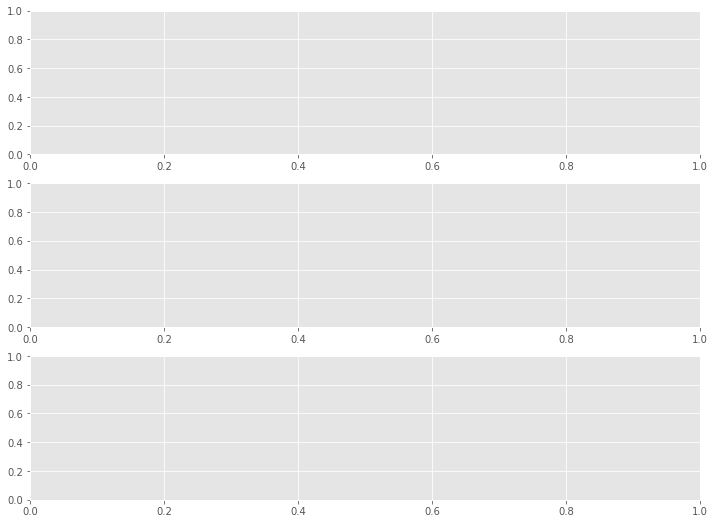

In [22]:
style.use('ggplot')

def get_q_color(value,vals):
    if value == max(vals):
        return "green", 1.0
    else:
        return "red", 0.3

fig = plt.figure(figsize=(12,9))

for i in range(0,10000,10):
    print(i)
    ax1 = fig.add_subplot(311)
    ax2 = fig.add_subplot(312)
    ax3 = fig.add_subplot(313)
    q_table = np.load(f"{i}-qtable.npy")
    
    
    counter = 0
    for x, x_vals in enumerate(q_table):
        if counter == 0:
            print(x,x_vals)
        for y, y_vals in enumerate(x_vals): #separamos la discretización de 0 49
            if counter == 0:
                print(y,y_vals)
                counter =1
            ax1.scatter(x, y, c=get_q_color(y_vals[0], y_vals)[0], marker="o", alpha=get_q_color(y_vals[0], y_vals)[1])
            ax1.scatter(x, y, c=get_q_color(y_vals[0], y_vals)[0], marker="o", alpha=get_q_color(y_vals[0], y_vals)[1])
            ax1.scatter(x, y, c=get_q_color(y_vals[0], y_vals)[0], marker="o", alpha=get_q_color(y_vals[0], y_vals)[1])
            
            ax1.set_ylabel("Action 0")
            ax2.set_ylabel("Action 1")
            ax3.set_ylabel("Action 2")
    plt.savefig("f{i}.png")
    plt.clf()